                                # FIRST NEURAL NETWORK ASSIGNMENT

# NAME:  AINE IAN

# REGISTRATION NUMBER: 2022/HD05/1758U

# STUDENT NUMBER: 2200701758

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


# IMPORTING THE CSV DATASET AND DOING EDA

In [2]:
dataset = pd.read_csv("C:\\Users\\Dell\\Desktop\\neural\\dataset_details\\dataset_details\\Python dataset.csv")

In [3]:
dataset.shape

(413, 28)

In [4]:
dataset

,cx01_hivstatus,gm_hyertension,gm_diabetes,cx01_age_diagnosis,cx01_hist_type,cx01_hist_grd,cx01_lyph_nodest,cx01_lyph_vsi,cx01_lyph_meta,cx01_dis_meta,...,Regions,tribe_cat,mstatus_cat,tum_size,age_cat5yr,BMI,Age_cat,religion_cat,STATUS,Recurrence
0,0.0,0,0,57,0,0,0.0,0,0,0.0,...,3,0,1,0,11.4,18.6,9,2,0,0
1,NaN,0,0,52,0,1,0.0,1,0,1.0,...,2,1,1,0,10.4,21.2,8,1,0,0
2,NaN,0,0,47,1,1,0.0,1,0,NaN,...,3,6,1,0,9.4,18.3,7,2,0,0
3,0.0,1,0,54,1,3,1.0,1,2,1.0,...,3,0,0,1,10.8,22.8,8,1,1,0
4,1.0,1,0,33,1,1,1.0,1,1,1.0,...,3,0,0,1,6.6,27.8,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1.0,0,0,27,1,3,NaN,1,0,NaN,...,3,0,1,1,5.4,NaN,3,2,0,0
409,0.0,0,0,65,1,2,0.0,0,0,0.0,...,0,5,0,0,13.0,16.5,10,1,0,0
410,1.0,0,0,51,1,1,1.0,1,0,1.0,...,3,0,1,1,10.2,23.9,8,1,1,1
411,NaN,0,0,57,1,2,0.0,1,0,0.0,...,1,7,0,0,11.4,25.6,9,1,0,0


In [5]:
dataset.head()


,cx01_hivstatus,gm_hyertension,gm_diabetes,cx01_age_diagnosis,cx01_hist_type,cx01_hist_grd,cx01_lyph_nodest,cx01_lyph_vsi,cx01_lyph_meta,cx01_dis_meta,...,Regions,tribe_cat,mstatus_cat,tum_size,age_cat5yr,BMI,Age_cat,religion_cat,STATUS,Recurrence
0,0.0,0,0,57,0,0,0.0,0,0,0.0,...,3,0,1,0,11.4,18.6,9,2,0,0
1,NaN,0,0,52,0,1,0.0,1,0,1.0,...,2,1,1,0,10.4,21.2,8,1,0,0
2,NaN,0,0,47,1,1,0.0,1,0,NaN,...,3,6,1,0,9.4,18.3,7,2,0,0
3,0.0,1,0,54,1,3,1.0,1,2,1.0,...,3,0,0,1,10.8,22.8,8,1,1,0
4,1.0,1,0,33,1,1,1.0,1,1,1.0,...,3,0,0,1,6.6,27.8,4,2,1,0


In [6]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cx01_hivstatus      316 non-null    float64
 1   gm_hyertension      413 non-null    int64  
 2   gm_diabetes         413 non-null    int64  
 3   cx01_age_diagnosis  413 non-null    int64  
 4   cx01_hist_type      413 non-null    int64  
 5   cx01_hist_grd       413 non-null    int64  
 6   cx01_lyph_nodest    396 non-null    float64
 7   cx01_lyph_vsi       413 non-null    int64  
 8   cx01_lyph_meta      413 non-null    int64  
 9   cx01_dis_meta       389 non-null    float64
 10  cx01_tumor_stage    413 non-null    int64  
 11  cx01_tumor_size     377 non-null    float64
 12  rx_surgery          413 non-null    int64  
 13  rx_chemothpy        413 non-null    int64  
 14  rx_radiothpy        413 non-null    int64  
 15  rx_immunothpy       413 non-null    int64  
 16  rx_hormo

In [7]:
dataset.describe()

,cx01_hivstatus,gm_hyertension,gm_diabetes,cx01_age_diagnosis,cx01_hist_type,cx01_hist_grd,cx01_lyph_nodest,cx01_lyph_vsi,cx01_lyph_meta,cx01_dis_meta,...,Regions,tribe_cat,mstatus_cat,tum_size,age_cat5yr,BMI,Age_cat,religion_cat,STATUS,Recurrence
count,316.00000,413.000000,413.00000,413.000000,413.000000,413.000000,396.000000,413.000000,413.000000,389.000000,...,413.000000,413.000000,413.000000,413.000000,413.000000,320.000000,413.000000,413.000000,413.000000,413.000000
mean,0.28481,0.067797,0.01937,48.566586,0.840194,1.680387,0.429293,0.840194,0.469734,0.491003,...,2.055690,3.404358,0.530266,0.600484,9.713317,26.436875,7.295400,1.612591,0.423729,0.130751
std,0.45204,0.251701,0.13799,10.242143,0.366871,0.955072,0.495601,0.366871,0.795728,0.500563,...,1.014123,2.974598,0.499688,0.490393,2.048429,31.324851,1.938347,0.932184,0.494748,0.337536
min,0.00000,0.000000,0.00000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.600000,14.000000,2.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.00000,40.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,8.000000,20.700000,6.000000,1.000000,0.000000,0.000000
50%,0.00000,0.000000,0.00000,49.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,...,2.000000,3.000000,1.000000,1.000000,9.800000,23.000000,7.000000,2.000000,0.000000,0.000000
75%,1.00000,0.000000,0.00000,56.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,7.000000,1.000000,1.000000,11.200000,25.700000,9.000000,2.000000,1.000000,0.000000
max,1.00000,1.000000,1.00000,69.000000,1.000000,3.000000,1.000000,1.000000,3.000000,1.000000,...,3.000000,7.000000,1.000000,1.000000,13.800000,461.100000,10.000000,3.000000,1.000000,1.000000


In [8]:
dataset.isnull()

,cx01_hivstatus,gm_hyertension,gm_diabetes,cx01_age_diagnosis,cx01_hist_type,cx01_hist_grd,cx01_lyph_nodest,cx01_lyph_vsi,cx01_lyph_meta,cx01_dis_meta,...,Regions,tribe_cat,mstatus_cat,tum_size,age_cat5yr,BMI,Age_cat,religion_cat,STATUS,Recurrence
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
409,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
411,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
print('Null values',dataset.isnull().sum())

Null values cx01_hivstatus        97
gm_hyertension         0
gm_diabetes            0
cx01_age_diagnosis     0
cx01_hist_type         0
cx01_hist_grd          0
cx01_lyph_nodest      17
cx01_lyph_vsi          0
cx01_lyph_meta         0
cx01_dis_meta         24
cx01_tumor_stage       0
cx01_tumor_size       36
rx_surgery             0
rx_chemothpy           0
rx_radiothpy           0
rx_immunothpy          0
rx_hormothpy           0
rx_others              0
Regions                0
tribe_cat              0
mstatus_cat            0
tum_size               0
age_cat5yr             0
BMI                   93
Age_cat                0
religion_cat           0
STATUS                 0
Recurrence             0
dtype: int64


# dealing with null values

In [10]:

# Fill null values in column cx01_tumor_size 
mean_tumor_size = dataset['cx01_tumor_size'].mean()
dataset['cx01_tumor_size'].fillna(mean_tumor_size, inplace=True)


# Fill null values in column cx01_dis_meta 
mode_dis_meta = dataset['cx01_dis_meta'].mode()[0]
dataset['cx01_dis_meta'].fillna(mode_dis_meta, inplace=True)


# Fill null values in column cx01_lyph_nodest 
mode_lyph_nodest = dataset['cx01_lyph_nodest'].mode()[0]
dataset['cx01_lyph_nodest'].fillna(mode_lyph_nodest, inplace=True)


#using "2" to represent the null values in cx01_hivstatus
dataset["cx01_hivstatus"].fillna(value='2', inplace=True)

# converting the data type of 2 to match the rest
dataset['cx01_hivstatus'] = dataset['cx01_hivstatus'].astype('float32')


# Fill null values in column BMI 
dataset['BMI'].fillna(dataset['BMI'].median(), inplace=True)



In [11]:
print('Null values',dataset.isnull().sum())

Null values cx01_hivstatus        0
gm_hyertension        0
gm_diabetes           0
cx01_age_diagnosis    0
cx01_hist_type        0
cx01_hist_grd         0
cx01_lyph_nodest      0
cx01_lyph_vsi         0
cx01_lyph_meta        0
cx01_dis_meta         0
cx01_tumor_stage      0
cx01_tumor_size       0
rx_surgery            0
rx_chemothpy          0
rx_radiothpy          0
rx_immunothpy         0
rx_hormothpy          0
rx_others             0
Regions               0
tribe_cat             0
mstatus_cat           0
tum_size              0
age_cat5yr            0
BMI                   0
Age_cat               0
religion_cat          0
STATUS                0
Recurrence            0
dtype: int64


In [12]:
dataset.head()

,cx01_hivstatus,gm_hyertension,gm_diabetes,cx01_age_diagnosis,cx01_hist_type,cx01_hist_grd,cx01_lyph_nodest,cx01_lyph_vsi,cx01_lyph_meta,cx01_dis_meta,...,Regions,tribe_cat,mstatus_cat,tum_size,age_cat5yr,BMI,Age_cat,religion_cat,STATUS,Recurrence
0,0.0,0,0,57,0,0,0.0,0,0,0.0,...,3,0,1,0,11.4,18.6,9,2,0,0
1,2.0,0,0,52,0,1,0.0,1,0,1.0,...,2,1,1,0,10.4,21.2,8,1,0,0
2,2.0,0,0,47,1,1,0.0,1,0,0.0,...,3,6,1,0,9.4,18.3,7,2,0,0
3,0.0,1,0,54,1,3,1.0,1,2,1.0,...,3,0,0,1,10.8,22.8,8,1,1,0
4,1.0,1,0,33,1,1,1.0,1,1,1.0,...,3,0,0,1,6.6,27.8,4,2,1,0


In [13]:
dataset.shape

(413, 28)

# Converting our dataframe into an array


In [14]:
#making the dataset a numpy array
dataset = dataset.to_numpy()


In [15]:
dataset

array([[0., 0., 0., ..., 2., 0., 0.],
       [2., 0., 0., ..., 1., 0., 0.],
       [2., 0., 0., ..., 2., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 1.],
       [2., 0., 0., ..., 1., 0., 0.],
       [2., 0., 0., ..., 3., 0., 0.]])

Sliptting the dataset into the indepent(X) and depedent(Y) variables

In [16]:
#input values for x
X = dataset[:,0:26]

#depedent variable
Y = dataset[:,-2]    #includes the last two(2) columns only

# scaling the dataset so that all the input features lie between 0 and 1 inclusive

In [17]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [18]:
#the scaled dataset is stored in the X_scale as shown below 
X_scale  

array([[0.        , 0.        , 0.        , ..., 0.01028853, 0.875     ,
        0.66666667],
       [1.        , 0.        , 0.        , ..., 0.01610378, 0.75      ,
        0.33333333],
       [1.        , 0.        , 0.        , ..., 0.00961754, 0.625     ,
        0.66666667],
       ...,
       [0.5       , 0.        , 0.        , ..., 0.0221427 , 0.75      ,
        0.33333333],
       [1.        , 0.        , 0.        , ..., 0.02594498, 0.875     ,
        0.33333333],
       [1.        , 0.        , 0.        , ..., 0.00872288, 0.375     ,
        1.        ]])

# split our dataset into a training set, a validation set and a test set

In [19]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)


In [20]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [21]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(289, 26) (62, 26) (62, 26) (289,) (62,) (62,)


# Building and Training the first Neural Network

Neural network architecture

In [22]:

model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(26,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])





Configuring the model

In [23]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training the model

In [24]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
10/10 [==============================] - 0s 17ms/step - loss: 0.7085 - accuracy: 0.4983 - val_loss: 0.7088 - val_accuracy: 0.4194
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.5294 - val_loss: 0.7070 - val_accuracy: 0.4194
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6982 - accuracy: 0.5398 - val_loss: 0.6979 - val_accuracy: 0.5161
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5329 - val_loss: 0.6982 - val_accuracy: 0.5000
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5536 - val_loss: 0.6924 - val_accuracy: 0.5161
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5398 - val_loss: 0.6876 - val_accuracy: 0.6129
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.5260 - val_loss: 0.6875 - val_accuracy: 0.5645
Epoch 8/100


Evaluating on the test set

In [25]:
model.evaluate(X_test, Y_test)[1]

2/2 [==============================] - 0s 0s/step - loss: 0.6153 - accuracy: 0.6613


0.6612903475761414

# Visualizing Loss and Accuracy

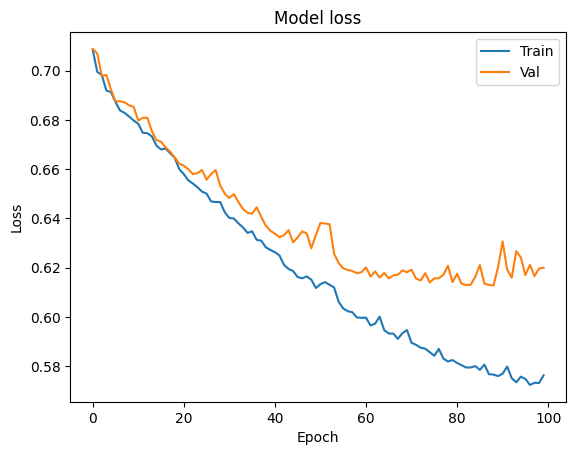

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

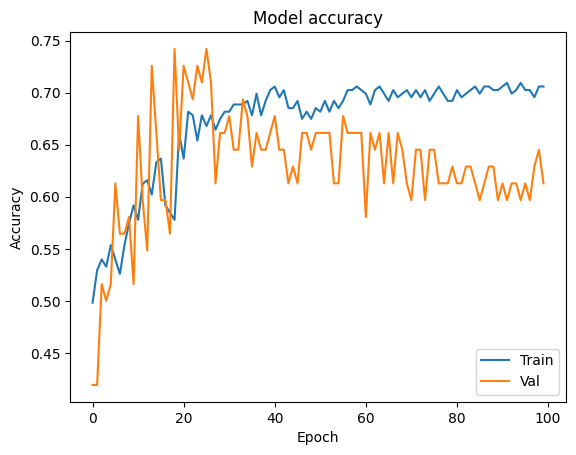

In [27]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Adding Regularization to our Neural Network

In [28]:

model_2 = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(26,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])



In [29]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
10/10 [==============================] - 1s 12ms/step - loss: 0.6921 - accuracy: 0.4810 - val_loss: 0.6884 - val_accuracy: 0.5806
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5640 - val_loss: 0.6836 - val_accuracy: 0.5484
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.5571 - val_loss: 0.6781 - val_accuracy: 0.5645
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6633 - accuracy: 0.5571 - val_loss: 0.6764 - val_accuracy: 0.5645
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6559 - accuracy: 0.5571 - val_loss: 0.6755 - val_accuracy: 0.5645
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.5917 - val_loss: 0.6727 - val_accuracy: 0.6613
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6437 - accuracy: 0.6886 - val_loss: 0.6704 - val_accuracy: 0.6290
Epoch 8/100


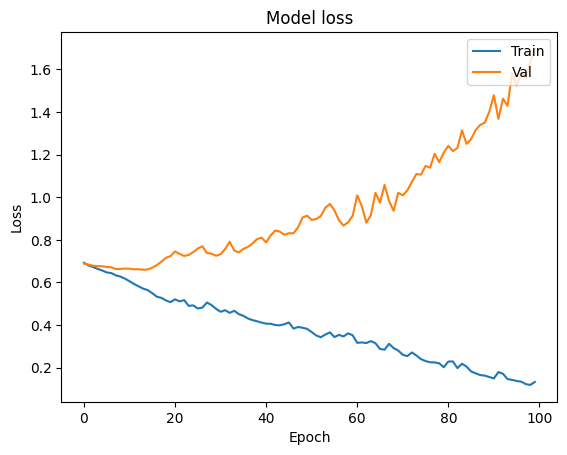

In [30]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

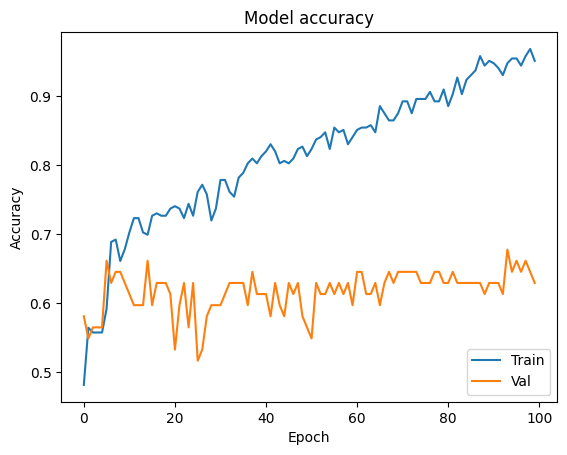

In [31]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# the model loss graph shows
The training loss is decreasing 
yet validation loss is increasing 

# the model accuracy graph shows:
the training accuracy increasing 
where as validation accuracy is decreasing  thus suggesting overfitting


Using  L2 regularization to reduce over fitting

In [32]:
model_3 = Sequential([
    Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(26,)),
    Dropout(0.3),
    Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [33]:
model_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,batch_size=32, epochs=100,validation_data=(X_val, Y_val))

Epoch 1/100
10/10 [==============================] - 1s 13ms/step - loss: 2.5403 - accuracy: 0.5744 - val_loss: 2.4057 - val_accuracy: 0.5645
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 2.3711 - accuracy: 0.5502 - val_loss: 2.2731 - val_accuracy: 0.5806
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2194 - accuracy: 0.5917 - val_loss: 2.1559 - val_accuracy: 0.5484
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 2.1115 - accuracy: 0.5260 - val_loss: 2.0388 - val_accuracy: 0.5968
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 1.9875 - accuracy: 0.5952 - val_loss: 1.9285 - val_accuracy: 0.6129
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 1.8907 - accuracy: 0.5709 - val_loss: 1.8294 - val_accuracy: 0.5968
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 1.7945 - accuracy: 0.5536 - val_loss: 1.7390 - val_accuracy: 0.5645
Epoch 8/100


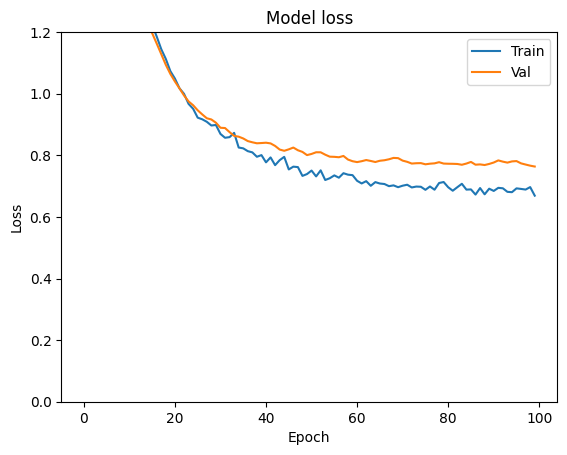

In [34]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

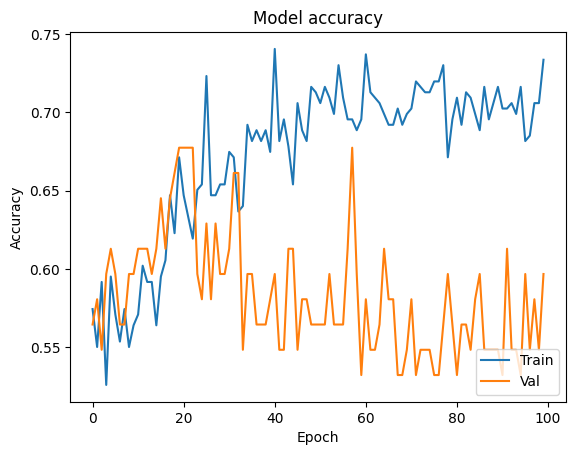

In [35]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [36]:

#instantiate the model
logistic_regression = LogisticRegression()

#fit the model using the training data
logistic_regression.fit(X_train,Y_train)

#use model to make predictions on test data
y_pred = logistic_regression.predict(X_test)

#print classification report for model
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80        42
         1.0       0.57      0.60      0.59        20

    accuracy                           0.73        62
   macro avg       0.69      0.69      0.69        62
weighted avg       0.73      0.73      0.73        62



# Thank you so much